In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [5]:
#Display the first few rows of the dataset
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
# Select relevant columns
df = df[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3', 'Rating']]


In [7]:
# Handle missing values (if any)
df = df.dropna()


In [8]:
# Define features and target variable
X = df[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3' ]]
y = df['Rating']


In [9]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [10]:
# Preprocessing for categorical data
categorical_features = ['Genre', 'Director',  'Actor 1','Actor 2','Actor 3']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director',  'Actor 1','Actor 2','Actor 3'])
    ],
    remainder='passthrough'
)

In [11]:
# Create a preprocessing and training pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Fit the model using the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', LinearRegression())])

In [14]:
# Predict the ratings for the test set
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [15]:
# Calculate evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))



Mean Squared Error: 6.61495047214533
R^2 Score: -2.570173244108886


Matplotlib is building the font cache; this may take a moment.


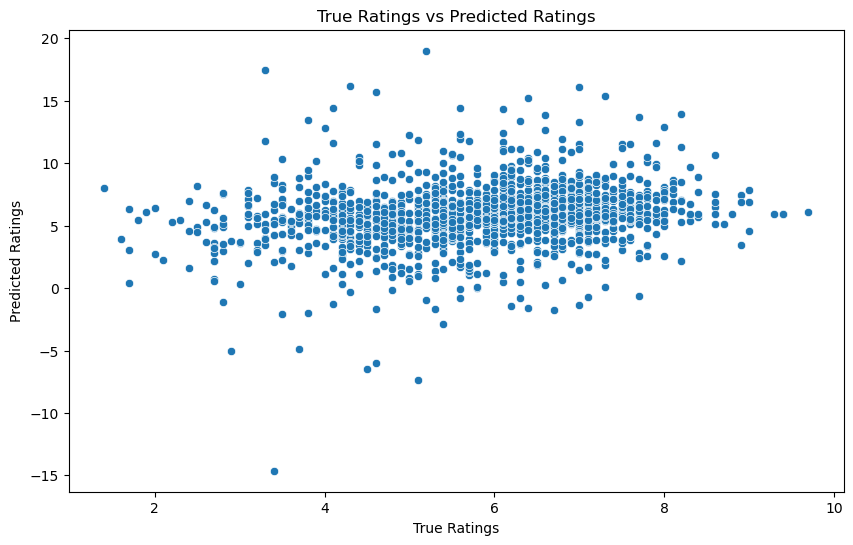

In [16]:
#Visualize the performance of your model by plotting true vs. predicted ratings.

import matplotlib.pyplot as plt
import seaborn as sns

# Plot true vs predicted ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.title('True Ratings vs Predicted Ratings')
plt.show()


Interpretation

 The points are large deviations from the line, it suggests that the model might not be capturing the relationships well, 
indicating that improvements or different models might be needed.
As well as this model has low R² and high MSE, it suggests that the model might not be capturing all the relevant aspects of movie ratings. 
Consider incorporating more features or trying more sophisticated models.

